In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/creating-new-features-with-train-split-coling/coling_train.csv')
test_df = pd.read_csv('/kaggle/input/creating-additional-features-for-pan-clef/test.csv')

In [2]:
train_df.head()

,Unnamed: 0,text,label,character_count,word_count,sentence_count,paragraph_count,stopword_count,unique_word_count,sentiment_polarity,...,specificity_score,figurative_language_score,paragraph_coherence_consistency,predictability_score,hedge_uncertainty_score,transition_variety_score,grammatical_mistakes,pos_2gram_variety,pos_3gram_variety,pos_4gram_variety
0,303000,[Additional step] Slowly lift one foot off the...,1,229.0,45.0,1.0,1.0,21.0,38.0,0.018750,...,0.211538,0.0,0.000000,3.548582,0.0,0.0,0.0,28.0,39.0,42.0
1,301662,Traveling without overpacking can seem like an...,1,2318.0,419.0,23.0,11.0,214.0,223.0,0.090244,...,0.185501,1.0,0.171887,4.909736,0.0,0.0,5.0,79.0,210.0,314.0
2,525531,The abolishment of the Caliphate was a major e...,1,1928.0,320.0,15.0,6.0,162.0,116.0,0.096059,...,0.255618,0.0,0.553291,4.060365,0.0,1.0,0.0,52.0,112.0,166.0
3,13155,Beer ranges from less than 3 alcohol by volume...,0,606.0,110.0,5.0,1.0,46.0,80.0,0.071667,...,0.325758,0.0,0.000000,4.170292,0.0,0.0,5.0,42.0,76.0,93.0
4,591716,Institute of Eastern Europe (IEE) is the large...,1,382.0,57.0,2.0,2.0,23.0,51.0,0.000000,...,0.367647,0.0,0.061345,3.872805,0.0,0.0,4.0,31.0,44.0,50.0


In [3]:
train_df.columns

Index(['Unnamed: 0', 'text', 'label', 'character_count', 'word_count',
       'sentence_count', 'paragraph_count', 'stopword_count',
       'unique_word_count', 'sentiment_polarity', 'sentiment_subjectivity',
       'discourse_marker_count', 'vocab_size', 'sentence_complexity',
       'punctuation_count', 'sentence_length_difference', 'type_token_ratio',
       'word_entropy', 'flesch_reading_ease', 'gzip_ratio', 'negation_freq',
       'question_stmt_ratio', 'clause_sentence_ratio', 'modal_freq',
       'pronoun_ratio', 'pos_diversity', 'hapax_ratio',
       'sentence_length_variation', 'repetition_rate', 'personal_voice_score',
       'emotion_variation', 'specificity_score', 'figurative_language_score',
       'paragraph_coherence_consistency', 'predictability_score',
       'hedge_uncertainty_score', 'transition_variety_score',
       'grammatical_mistakes', 'pos_2gram_variety', 'pos_3gram_variety',
       'pos_4gram_variety'],
      dtype='object')

In [4]:
FEATURES = [ 'character_count',
       'word_count', 'sentence_count', 'paragraph_count', 'stopword_count',
       'unique_word_count', 'sentiment_polarity',
       'sentiment_subjectivity', 'discourse_marker_count', 'vocab_size',
       'sentence_complexity', 'punctuation_count',
       'sentence_length_difference', 'type_token_ratio', 'word_entropy',
       'flesch_reading_ease', 'gzip_ratio', 'negation_freq',
       'question_stmt_ratio', 'clause_sentence_ratio', 'modal_freq',
       'pronoun_ratio', 'pos_diversity', 'hapax_ratio',
       'sentence_length_variation', 'repetition_rate', 'personal_voice_score',
       'emotion_variation', 'specificity_score', 'figurative_language_score',
       'paragraph_coherence_consistency', 'predictability_score',
       'hedge_uncertainty_score', 'transition_variety_score',
       'grammatical_mistakes', 'pos_2gram_variety', 'pos_3gram_variety',
       'pos_4gram_variety'
]
TARGET = 'label'

In [5]:
X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   character_count                  5000 non-null   float64
 1   word_count                       5000 non-null   float64
 2   sentence_count                   5000 non-null   float64
 3   paragraph_count                  5000 non-null   float64
 4   stopword_count                   5000 non-null   float64
 5   unique_word_count                5000 non-null   float64
 6   sentiment_polarity               5000 non-null   float64
 7   sentiment_subjectivity           5000 non-null   float64
 8   discourse_marker_count           5000 non-null   float64
 9   vocab_size                       5000 non-null   float64
 10  sentence_complexity              5000 non-null   float64
 11  punctuation_count                5000 non-null   float64
 12  sentence_length_diff

In [7]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import joblib
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
from nltk.tokenize import sent_tokenize
from collections import Counter
import spacy
import re
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import math

nlp = spacy.load("en_core_web_sm")

def sentence_length_variation(text):
    sentences = sent_tokenize(text)
    lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

    if len(lengths) < 2:
        return 0.0  

    return np.std(lengths)   # Standard deviation

# def vocabulary_diversity(text): ## same as type token ratio
#     words = [w.lower() for w in text.split() if w.isalpha()]
#     if len(words) == 0:
#         return 0
#     return len(set(words)) / len(words)

def repetition_rate(text):
    words = [w.lower() for w in text.split()]
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    if len(bigrams) == 0:
        return 0

    counts = Counter(bigrams)
    repeated = sum(1 for bg, c in counts.items() if c > 1)

    return repeated / len(bigrams)

def personal_voice_score(text):
    personal_pronouns = {"i", "me", "my", "mine", "we", "us", "our", "ours"}
    words = [w.lower() for w in text.split()]
    count = sum(1 for w in words if w in personal_pronouns)
    if len(words) == 0:
        return 0
    return count / len(words)

def emotion_variation(text):
    sentences = sent_tokenize(text)
    if len(sentences) < 2:
        return 0

    sentiments = [TextBlob(s).sentiment.polarity for s in sentences]
    diffs = [abs(sentiments[i] - sentiments[i+1]) for i in range(len(sentiments)-1)]

    return np.mean(diffs)


def specificity_score(text):
    doc = nlp(text)
    concrete_tags = {"NOUN", "PROPN", "NUM"}  
    concrete_count = sum(1 for token in doc if token.pos_ in concrete_tags)
    if len(doc) == 0:
        return 0
    return concrete_count / len(doc)


def imperfection_score(text):
    words = [w for w in re.findall(r"\b\w+\b", text)]
    if len(words) == 0:
        return 0

    misspelled = sum(1 for w in words if Word(w).correct().lower() != w.lower())
    return misspelled / len(words)

figurative_markers = [
    "like", "as if", "as though", "metaphor", "symbolic", 
    "resembles", "reminds me of", "figurative"
]

def figurative_language_score(text):
    t = text.lower()
    count = sum(t.count(m) for m in figurative_markers)
    return count

def paragraph_coherence_consistency(text):
    paragraphs = [p.strip() for p in text.split("\n") if len(p.strip()) > 0]

    if len(paragraphs) < 2:
        return 0

    vec = TfidfVectorizer().fit_transform(paragraphs)
    sims = []

    for i in range(len(paragraphs)-1):
        sim = cosine_similarity(vec[i], vec[i+1])[0][0]
        sims.append(sim)

    return np.mean(sims)


def predictability_score(text):
    words = [w.lower() for w in text.split()]
    counts = Counter(words)
    total = len(words)
    if total == 0:
        return 0

    probs = [counts[w]/total for w in words]
    surprise = [-math.log(p) for p in probs]

    return np.mean(surprise)

hedge_words = {
    "maybe", "perhaps", "sort of", "kind of", "i guess", 
    "probably", "possibly", "apparently", "roughly"
}

def hedge_uncertainty_score(text):
    t = text.lower()
    count = sum(t.count(hw) for hw in hedge_words)
    return count

transitions = [
    "however", "therefore", "meanwhile", "moreover", "furthermore",
    "in contrast", "on the other hand", "overall", "in summary"
]

def transition_variety_score(text):
    t = text.lower()
    count = sum(t.count(word) for word in transitions)
    return count

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define models to train
models = {
    'XGB': XGBClassifier(eval_metric='logloss', random_state=47),
    'Random Forest': RandomForestClassifier(random_state=47),
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=47))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=47))
    ]),    
}

results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save the model using joblib
    joblib.dump(model, f"{model_name.replace(' ', '_')}_model.joblib")

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

Training XGB...
Training Random Forest...
Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training SVM...


In [10]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  XGB  0.764001   0.931136  0.684256  0.788831
1        Random Forest  0.736695   0.935628  0.634948  0.756506
2  Logistic Regression  0.849540   0.854400  0.923875  0.887781
3                  SVM  0.773753   0.916204  0.714100  0.802625


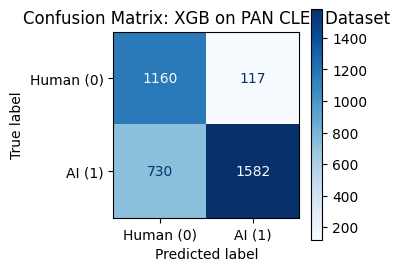

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions
pan_xgb_preds = models['XGB'].predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, pan_xgb_preds, labels=[0,1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human (0)', 'AI (1)'])
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix: XGB on PAN CLEF Dataset")
plt.show()


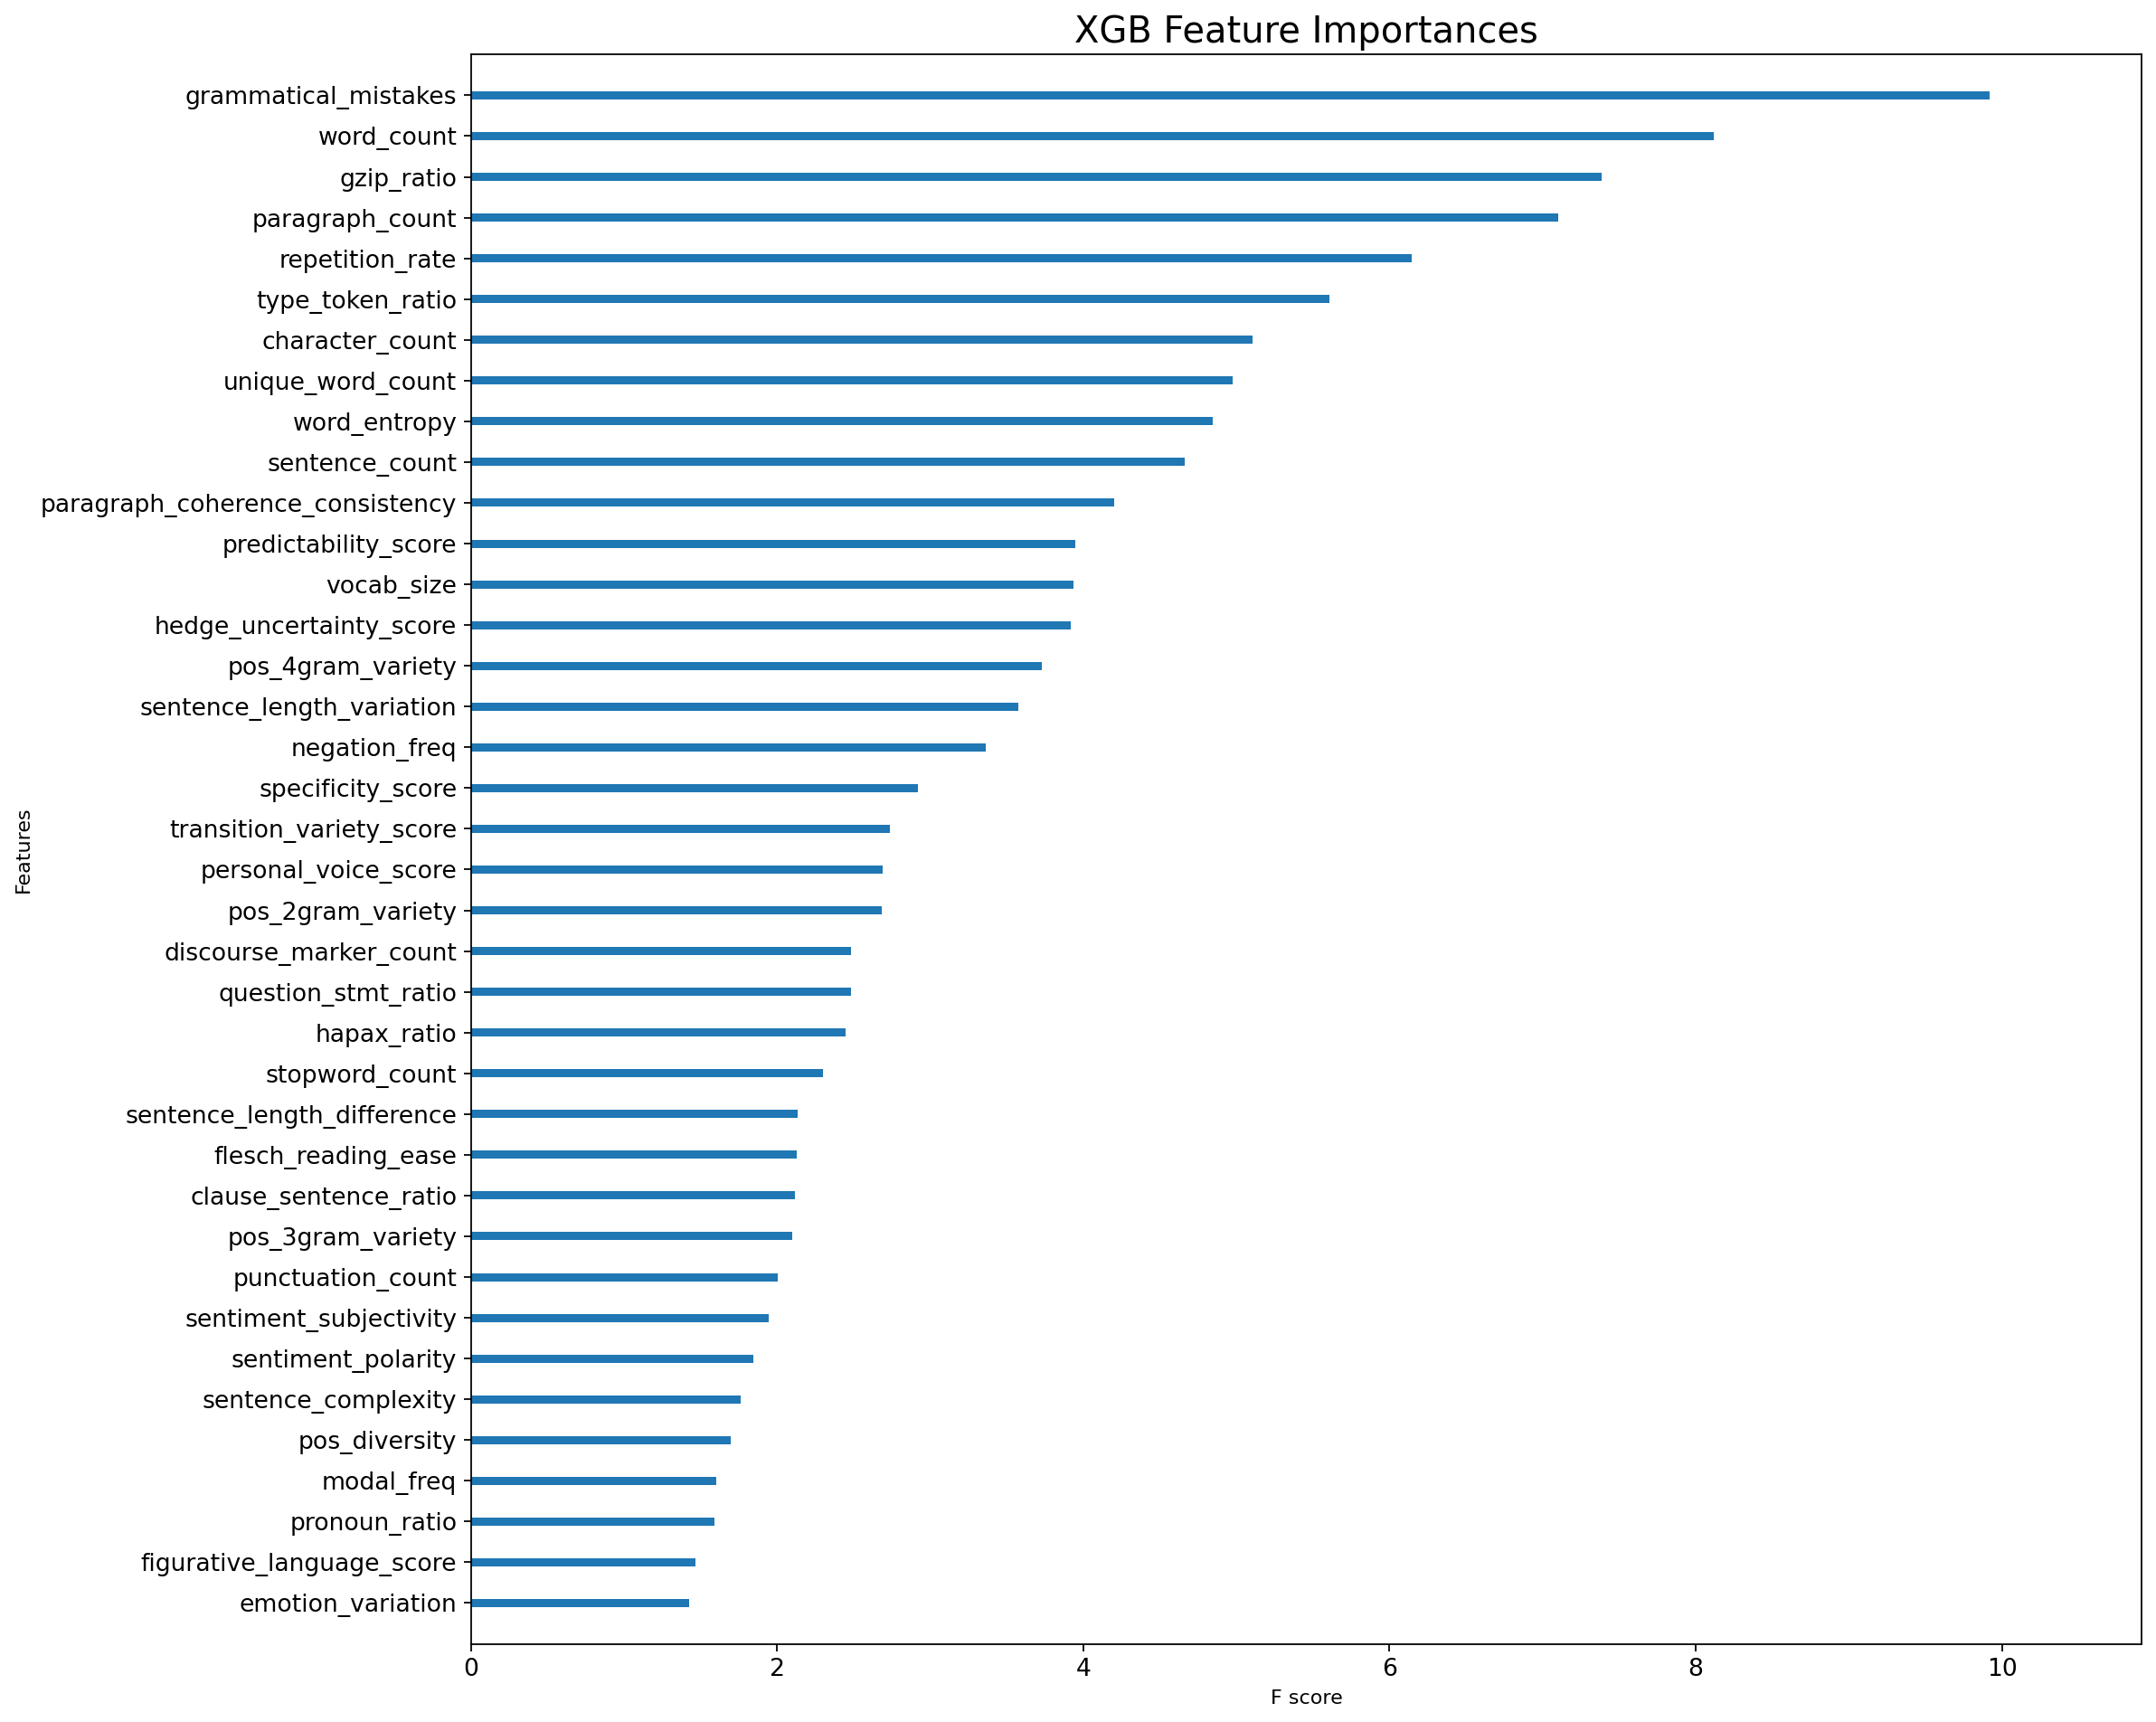

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 160      
fig, ax = plt.subplots(figsize=(15, 12))

xgb.plot_importance(
    models['XGB'],
    max_num_features=100,
    importance_type="gain",
    ax=ax,
    show_values=False,                
    grid=False
)

ax.set_title("XGB Feature Importances", fontsize=18)
ax.tick_params(axis="both", labelsize=12)
fig.tight_layout()
plt.show()

In [13]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': models['XGB'].feature_importances_
}).sort_values(by='importance', ascending=False)

In [14]:
importance_df 

,feature,importance
34,grammatical_mistakes,0.073437
1,word_count,0.060089
16,gzip_ratio,0.054655
3,paragraph_count,0.052581
25,repetition_rate,0.045471
13,type_token_ratio,0.041519
0,character_count,0.037792
5,unique_word_count,0.036837
14,word_entropy,0.035854
2,sentence_count,0.034532


In [14]:
# %%capture
# !pip install pipreqs

In [15]:
# !pipreqs .

In [15]:
import shap

explainer = shap.TreeExplainer(models['XGB'])
shap_values = explainer.shap_values(X_train)

* **Red** = higher feature values

* **Blue** = lower feature values

* **Right** = pushes toward AI-generated label (1)

* **Left** = pushes toward human-written label (0)

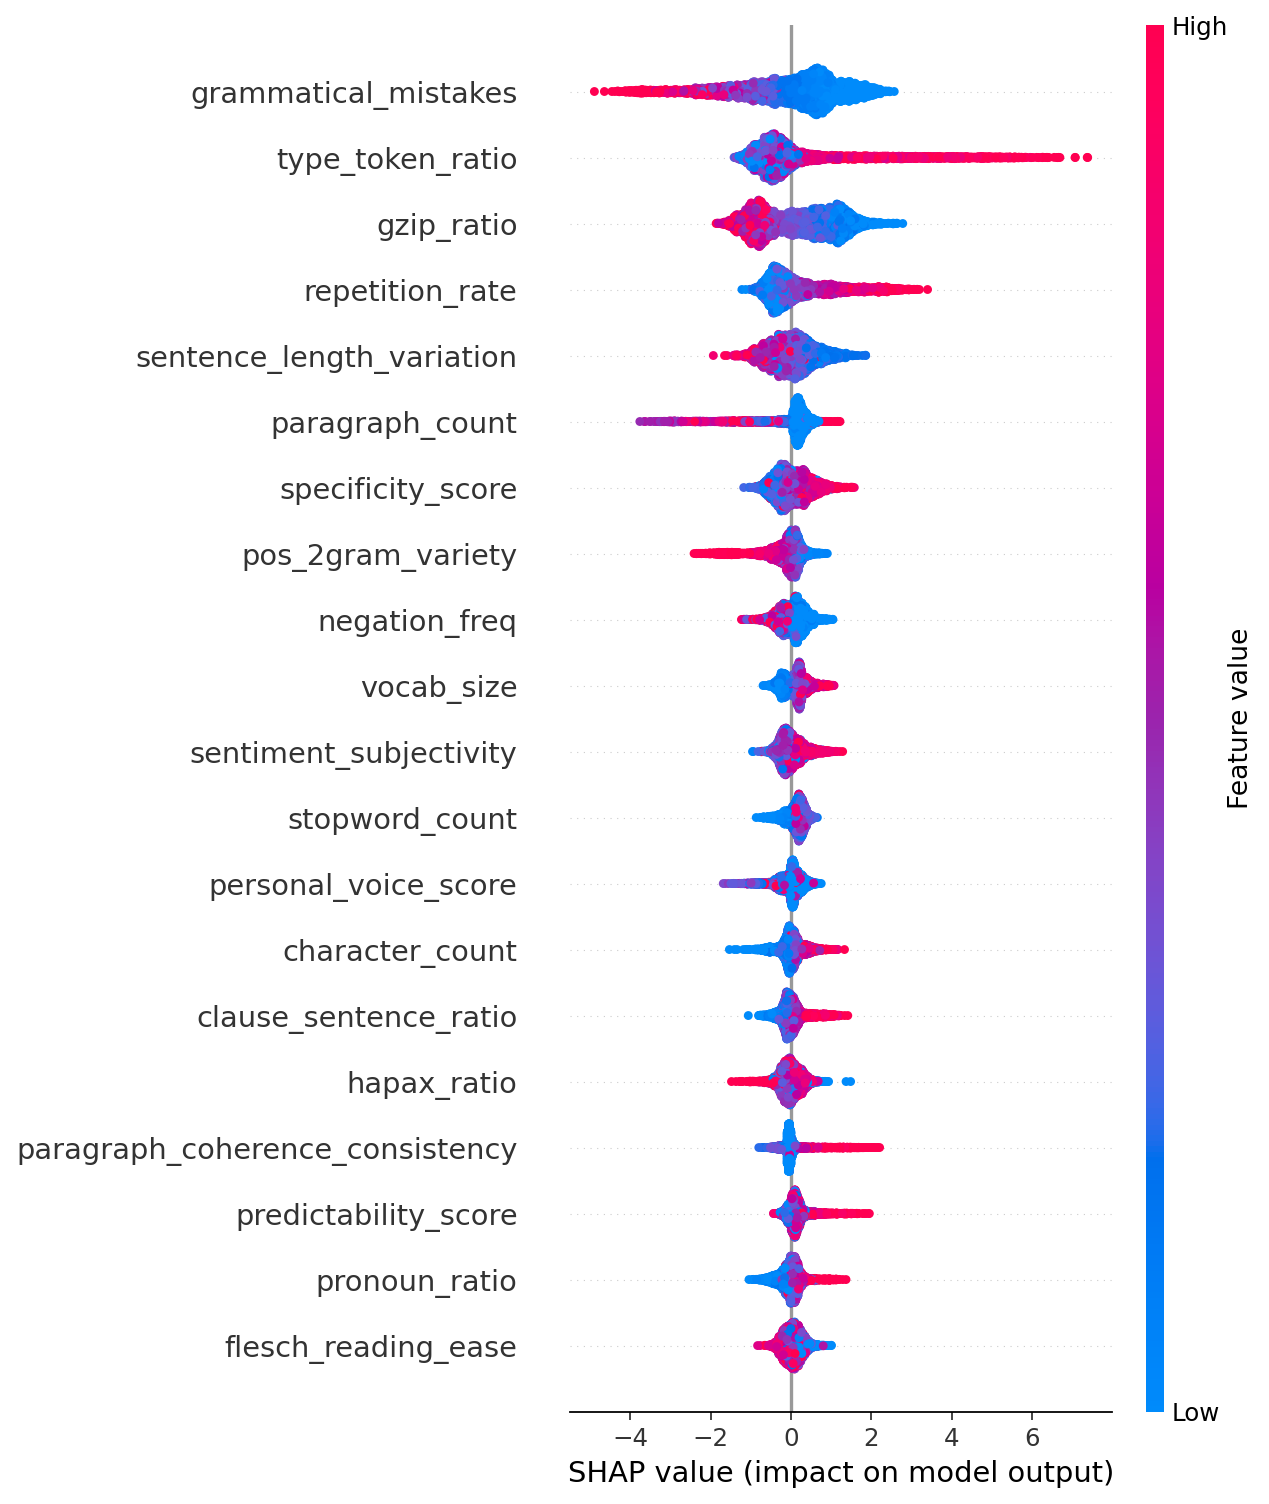

<Figure size 1024x768 with 0 Axes>

In [16]:
shap.summary_plot(shap_values, X_train)
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')

The figure layout has changed to tight


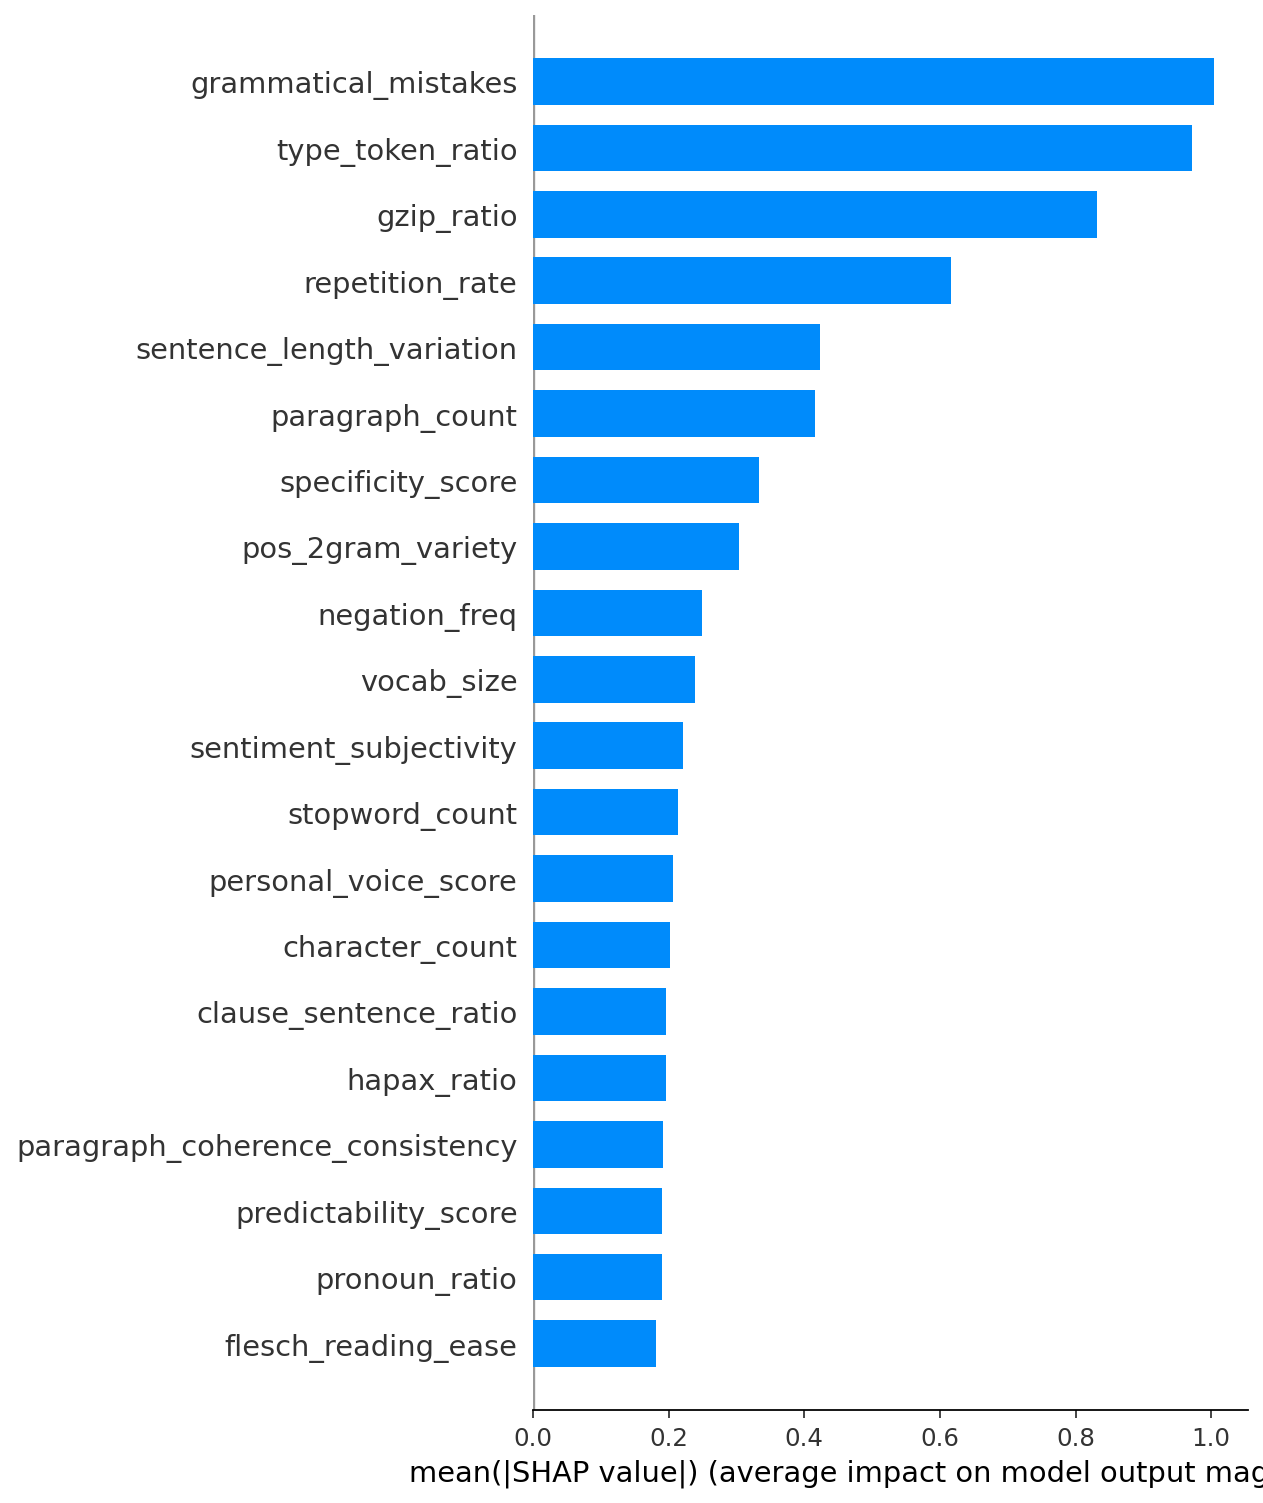

In [17]:
plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)
plt.tight_layout()
plt.savefig('shap_global_importance.png', dpi=300)

## Sentencewise probability of being AI-generated

In [19]:
!pip install textstat -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.6 MB/s eta 0:00:00:00:01


In [20]:
import polars as pl
import re
import string
from collections import Counter
from textblob import TextBlob
import textstat
import spacy
from scipy.stats import entropy
import gzip
from nltk.corpus import stopwords
import shap
import xgboost as xgb
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import re

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

# Define all feature functions
def vocabSize(sentence):
    doc = nlp(sentence.lower())
    tokens = set([token.text for token in doc if not token.is_punct])
    return len(tokens)

def sentence_complexity(sentence):
    flesch_score = textstat.flesch_reading_ease(sentence)
    fk_grade_level = textstat.flesch_kincaid_grade(sentence)
    gunning_fog = textstat.gunning_fog(sentence)
    smog_index = textstat.smog_index(sentence)
    composite_score = (flesch_score * 0.2 + fk_grade_level * 0.3 + 
                      gunning_fog * 0.3 + smog_index * 0.2)
    return composite_score

def punctuation_count(paragraph):
    return sum(1 for char in paragraph if char in string.punctuation)

def sentence_length_difference(paragraph):
    sentences = re.split(r'[.!?]', paragraph)
    sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        return 0
    sentence_lengths = [len(s.split()) for s in sentences]
    return max(sentence_lengths) - min(sentence_lengths)

def type_token_ratio(text):
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

def pos_counts(text):
    doc = nlp(text)
    pos_count_dict = {}
    for token in doc:
        pos = token.pos_
        pos_count_dict[pos] = pos_count_dict.get(pos, 0) + 1
    return pos_count_dict

def count_discourse_markers(text):
    discourse_markers = ["however", "therefore", "although", "nevertheless", "hence"]
    return sum(text.lower().count(marker) for marker in discourse_markers)

def word_entropy(text):
    doc = nlp(text)
    words = [t.lemma_.lower() for t in doc if t.is_alpha]
    if not words:
        return 0
    freqs = list(Counter(words).values())
    return entropy(freqs)

def flesch_reading_ease(text):
    try:
        return textstat.flesch_reading_ease(text)
    except:
        return 0

def gzip_ratio(text):
    if len(text) == 0:
        return 0
    compressed = len(gzip.compress(text.encode('utf-8')))
    return compressed / len(text)

def negation_frequency(text):
    doc = nlp(text)
    negations = [t for t in doc if t.dep_ == "neg" or 
                 t.lemma_.lower() in ["not", "no", "never", "none", "n't"]]
    total_words = len([t for t in doc if t.is_alpha])
    return len(negations) / (total_words + 1e-5)

def question_statement_ratio(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    if not sentences:
        return 0
    question_count = sum(1 for s in sentences if s.text.strip().endswith("?"))
    statement_count = sum(1 for s in sentences if s.text.strip().endswith("."))
    return question_count / (statement_count + 1e-5)

def clause_to_sentence_ratio(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    if not sentences:
        return 0
    clause_markers = ("mark", "advcl", "ccomp", "xcomp", "acl", "relcl", "conj")
    clause_count = sum(1 for t in doc if t.dep_ in clause_markers)
    return clause_count / len(sentences)

def modal_verb_frequency(text):
    doc = nlp(text)
    modals = {"can", "could", "may", "might", "shall", "should", "will", "would", "must"}
    modal_count = sum(1 for t in doc if t.lemma_.lower() in modals)
    total_words = len([t for t in doc if t.is_alpha])
    return modal_count / (total_words + 1e-5)

def pronoun_ratio(text):
    doc = nlp(text)
    pronouns = [t for t in doc if t.pos_ == "PRON"]
    total_words = len([t for t in doc if t.is_alpha])
    return len(pronouns) / (total_words + 1e-5)

def pos_diversity(text):
    doc = nlp(text)
    pos_tags = [t.pos_ for t in doc if t.is_alpha]
    if not pos_tags:
        return 0
    counts = Counter(pos_tags)
    return entropy(list(counts.values()))

def hapax_legomena_ratio(text):
    doc = nlp(text)
    words = [t.lemma_.lower() for t in doc if t.is_alpha]
    if not words:
        return 0
    freqs = Counter(words)
    hapax = sum(1 for w, f in freqs.items() if f == 1)
    return hapax / len(freqs)

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def count_stopwords(text):
    return len([word for word in text.split() if word.lower() in stop_words])

In [21]:
ai_text = "Quantum mechanics is the branch of physics that describes the behaavior of matter and energy at the smallest scales, such as atoms, electrons, and photons. Unlike classical physics, which assumes particles have definite positions and velocities, quantum mechanics reveals that particles can exist in superpositions—being in multiple states at once—and their behavior is fundamentally probabilistic. Key concepts include wave-particle duality, where particles behave like both waves and particles, and entanglement, where particles become linked so that the state of one instantly affects the other, even across great distances. The theory is mathematically described using wavefunctions and has led to groundbreaking technologies like lasers, semiconductors, and quantum computing."
ai_text_label = 1

In [22]:
human_text = train_df[['text','label']].iloc[23704]['text']

## Evaluating on COLING

In [18]:
coling_test = pd.read_csv('/kaggle/input/creating-with-new-features-coling/coling_test3000.csv')
coling_test_data = coling_test[FEATURES]
coling_test_label = coling_test[TARGET]

In [19]:
coling_results = []
for model_name, model in models.items():
    print(f"Predicting with {model_name}...")
    
    # Train the model
    # model.fit(X_train, y_train)

    # Predict on test data
    y_pred_coling = model.predict(coling_test_data)

    # Calculate metrics
    accuracy = accuracy_score(coling_test_label, y_pred_coling)
    precision = precision_score(coling_test_label, y_pred_coling)
    recall = recall_score(coling_test_label, y_pred_coling)
    f1 = f1_score(coling_test_label, y_pred_coling)

    # Save the model using joblib
    # joblib.dump(model, f"{model_name.replace(' ', '_')}_model.joblib")

    coling_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

Predicting with XGB...
Predicting with Random Forest...
Predicting with Logistic Regression...
Predicting with SVM...


In [20]:
coling_result_df = pd.DataFrame(coling_results)
coling_result_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGB,0.8474,0.869904,0.890127,0.879899
1,Random Forest,0.8433,0.852506,0.907484,0.879136
2,Logistic Regression,0.7525,0.766643,0.871019,0.815505
3,SVM,0.8148,0.821335,0.901115,0.859377


## Analysing the error in prediction for COLING test

In [21]:
import shap

# def explain_coling_errors(model, X_coling, y_coling, feature_names, top_k=10):
#     """
#     Analyze incorrect predictions on the COLING dataset using SHAP.
    
#     Parameters:
#     - model: trained XGBoost model
#     - X_coling: feature matrix of COLING samples
#     - y_coling: true labels of COLING samples
#     - feature_names: list of feature column names
#     - top_k: number of strongest contributing features to display

#     Returns:
#     - DataFrame summarizing explanations for all mistakes
#     """

#     # Predict
#     y_pred = model.predict(X_coling)

#     # Identify incorrect predictions
#     incorrect_idx = np.where(y_pred != y_coling)[0]

#     if len(incorrect_idx) == 0:
#         print("🎉 No mistakes on COLING dataset!")
#         return pd.DataFrame()

#     print(f"Found {len(incorrect_idx)} incorrect predictions.\n")

#     # SHAP Explainer
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer(X_coling)

#     full_report = []

#     for idx in incorrect_idx:
#         true_label = y_coling[idx]
#         pred_label = y_pred[idx]

#         print("="*60)
#         print(f"🟥 Incorrect Sample Index: {idx}")
#         print(f"True Label: {true_label} | Predicted Label: {pred_label}")
#         print("-"*60)

#         sample_features = X_coling[idx:idx+1]
#         sample_shap = shap_values[idx]

#         # Extract top contributing features
#         abs_vals = np.abs(sample_shap.values)
#         sorted_idx = np.argsort(abs_vals)[::-1][:top_k]

#         explanations = []

#         for j in sorted_idx:
#             feat = feature_names[j]
#             fval = float(sample_features[0, j])
#             s_val = float(sample_shap.values[j])

#             direction = "AI" if s_val > 0 else "Human"
#             strength = round(abs(s_val), 4)

#             explanation = (
#                 f"- {feat}: value={round(fval,4)}, SHAP={s_val:+.4f} → "
#                 f"pushes toward **{direction}** (strength={strength})"
#             )

#             print(explanation)

#             explanations.append({
#                 "Index": idx,
#                 "True_Label": int(true_label),
#                 "Predicted_Label": int(pred_label),
#                 "Feature": feat,
#                 "Value": fval,
#                 "SHAP_Value": round(s_val, 4),
#                 "Direction": direction,
#                 "Contribution_Strength": strength
#             })

#         print("="*60 + "\n")

#         full_report.extend(explanations)

#     return pd.DataFrame(full_report)


import numpy as np
import pandas as pd

def shap_error_diagnostics(shap_values, preds, labels, feature_names, threshold=0.5):
    """
    SHAP-based diagnostic analysis:
    Splits predictions into TP, TN, FP, FN and computes mean absolute SHAP values.

    Parameters
    ----------
    shap_values : np.ndarray (n_samples, n_features)
        SHAP values from TreeExplainer or model-specific explainer.
    preds : np.ndarray (n_samples,)
        Model output probabilities.
    labels : np.ndarray (n_samples,)
        Ground truth binary labels (0 = human, 1 = AI).
    feature_names : list
        Names of features in correct order.
    threshold : float
        Decision threshold for converting prob → class.

    Returns
    -------
    pd.DataFrame:
        Diagnostic table with mean |SHAP| for TP, TN, FP, FN.

    Also prints:
        - Counts of each prediction type
        - Short interpretation notes
    """

    # Convert probabilities to hard predictions
    pred_labels = (preds >= threshold).astype(int)

    # Define groups
    TP_idx = (labels == 1) & (pred_labels == 1)
    TN_idx = (labels == 0) & (pred_labels == 0)
    FP_idx = (labels == 0) & (pred_labels == 1)
    FN_idx = (labels == 1) & (pred_labels == 0)

    # Helper function
    def mean_abs_shap(mask):
        if mask.sum() == 0:
            return np.zeros(shap_values.shape[1])
        return np.abs(shap_values[mask]).mean(axis=0)

    # Compute statistics
    shap_TP = mean_abs_shap(TP_idx)
    shap_TN = mean_abs_shap(TN_idx)
    shap_FP = mean_abs_shap(FP_idx)
    shap_FN = mean_abs_shap(FN_idx)

    # Build DataFrame
    df = pd.DataFrame({
        "TP_mean_abs_SHAP": shap_TP,
        "TN_mean_abs_SHAP": shap_TN,
        "FP_mean_abs_SHAP": shap_FP,
        "FN_mean_abs_SHAP": shap_FN,
    }, index=feature_names)

    # Sort features by mistake importance: FP + FN
    df["Error_Impact"] = df["FP_mean_abs_SHAP"] + df["FN_mean_abs_SHAP"]
    df = df.sort_values("Error_Impact", ascending=False)

    # Print useful diagnostics
    print("\n===== Prediction Breakdown =====")
    print(f"TP: {TP_idx.sum()}  (AI → AI)")
    print(f"TN: {TN_idx.sum()}  (Human → Human)")
    print(f"FP: {FP_idx.sum()}  (Human → AI)")
    print(f"FN: {FN_idx.sum()}  (AI → Human)")

    print("\n===== Interpretation =====")
    print("• Features with high FP_mean_abs_SHAP tend to *falsely push Human text toward AI*.")
    print("• Features with high FN_mean_abs_SHAP tend to *falsely push AI text toward Human*.")
    print("• Error_Impact = contribution to total model confusion.")
    # print("• Inspect top rows of the returned DataFrame for the root causes of errors.\n")

    return df

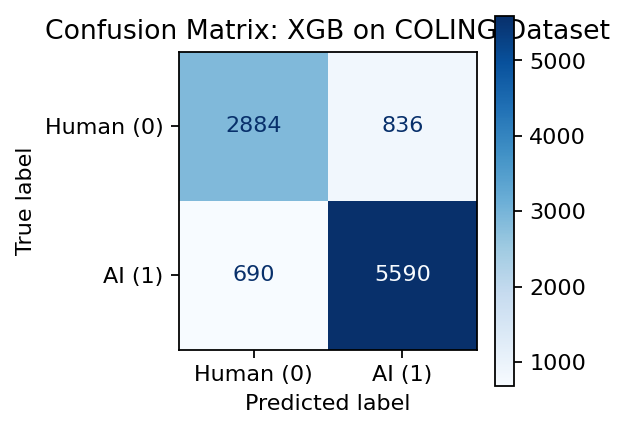

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions
coling_xgb_preds = models['XGB'].predict(coling_test_data)

# Compute confusion matrix
cm = confusion_matrix(coling_test_label, coling_xgb_preds, labels=[0,1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human (0)', 'AI (1)'])
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix: XGB on COLING Dataset")
plt.show()


In [23]:
coling_shap_values = explainer.shap_values(coling_test_data)
diagnostics = shap_error_diagnostics(
    shap_values=coling_shap_values, 
    preds=coling_xgb_preds, 
    labels=coling_test_label, 
    feature_names=FEATURES
)

diagnostics.head(15)


===== Prediction Breakdown =====
TP: 5590  (AI → AI)
TN: 2884  (Human → Human)
FP: 836  (Human → AI)
FN: 690  (AI → Human)

===== Interpretation =====
• Features with high FP_mean_abs_SHAP tend to *falsely push Human text toward AI*.
• Features with high FN_mean_abs_SHAP tend to *falsely push AI text toward Human*.
• Error_Impact = contribution to total model confusion.


,TP_mean_abs_SHAP,TN_mean_abs_SHAP,FP_mean_abs_SHAP,FN_mean_abs_SHAP,Error_Impact
grammatical_mistakes,0.894245,1.279636,0.821398,0.903932,1.725330
gzip_ratio,0.897800,0.708730,0.787515,0.812421,1.599936
type_token_ratio,1.088254,0.783648,0.772538,0.707384,1.479922
repetition_rate,0.732619,0.438229,0.570884,0.443397,1.014281
sentence_length_variation,0.397673,0.474290,0.394840,0.394850,0.789689
specificity_score,0.312777,0.345715,0.315688,0.326928,0.642617
paragraph_count,0.280952,0.697541,0.287679,0.297653,0.585331
pos_2gram_variety,0.225793,0.473268,0.232418,0.314010,0.546428
negation_freq,0.241456,0.267494,0.222870,0.232298,0.455168
sentiment_subjectivity,0.232158,0.200337,0.231961,0.205235,0.437196


In [44]:
shap_values.shape

(23707, 38)

In [45]:
pan_shap_values = explainer.shap_values(X_test)
diagnostics = shap_error_diagnostics(
    shap_values=pan_shap_values, 
    preds=pan_xgb_preds, 
    labels=y_test, 
    feature_names=FEATURES
)

diagnostics.head(15)


===== Prediction Breakdown =====
TP: 2268  (AI → AI)
TN: 1200  (Human → Human)
FP: 77  (Human → AI)
FN: 44  (AI → Human)

===== Interpretation =====
• Features with high FP_mean_abs_SHAP tend to *falsely push Human text toward AI*.
• Features with high FN_mean_abs_SHAP tend to *falsely push AI text toward Human*.
• Error_Impact = contribution to total model confusion.


,TP_mean_abs_SHAP,TN_mean_abs_SHAP,FP_mean_abs_SHAP,FN_mean_abs_SHAP,Error_Impact
sentence_length_variation,1.516564,1.447965,1.201886,1.728230,2.930117
pos_diversity,1.400787,1.822236,1.275262,1.466975,2.742236
punctuation_count,0.938030,0.866546,1.164625,0.976837,2.141462
hapax_ratio,1.031309,0.765817,1.033371,0.963978,1.997350
stopword_count,0.751270,0.768101,0.743219,0.685703,1.428922
pronoun_ratio,0.714282,0.645091,0.681040,0.696807,1.377847
pos_4gram_variety,0.674903,0.666014,0.651510,0.611794,1.263304
flesch_reading_ease,0.839684,0.584657,0.629283,0.631903,1.261186
paragraph_count,0.612456,0.501517,0.605685,0.546647,1.152332
character_count,0.495463,0.928505,0.390714,0.661221,1.051934


## SHAP plot for COLING test

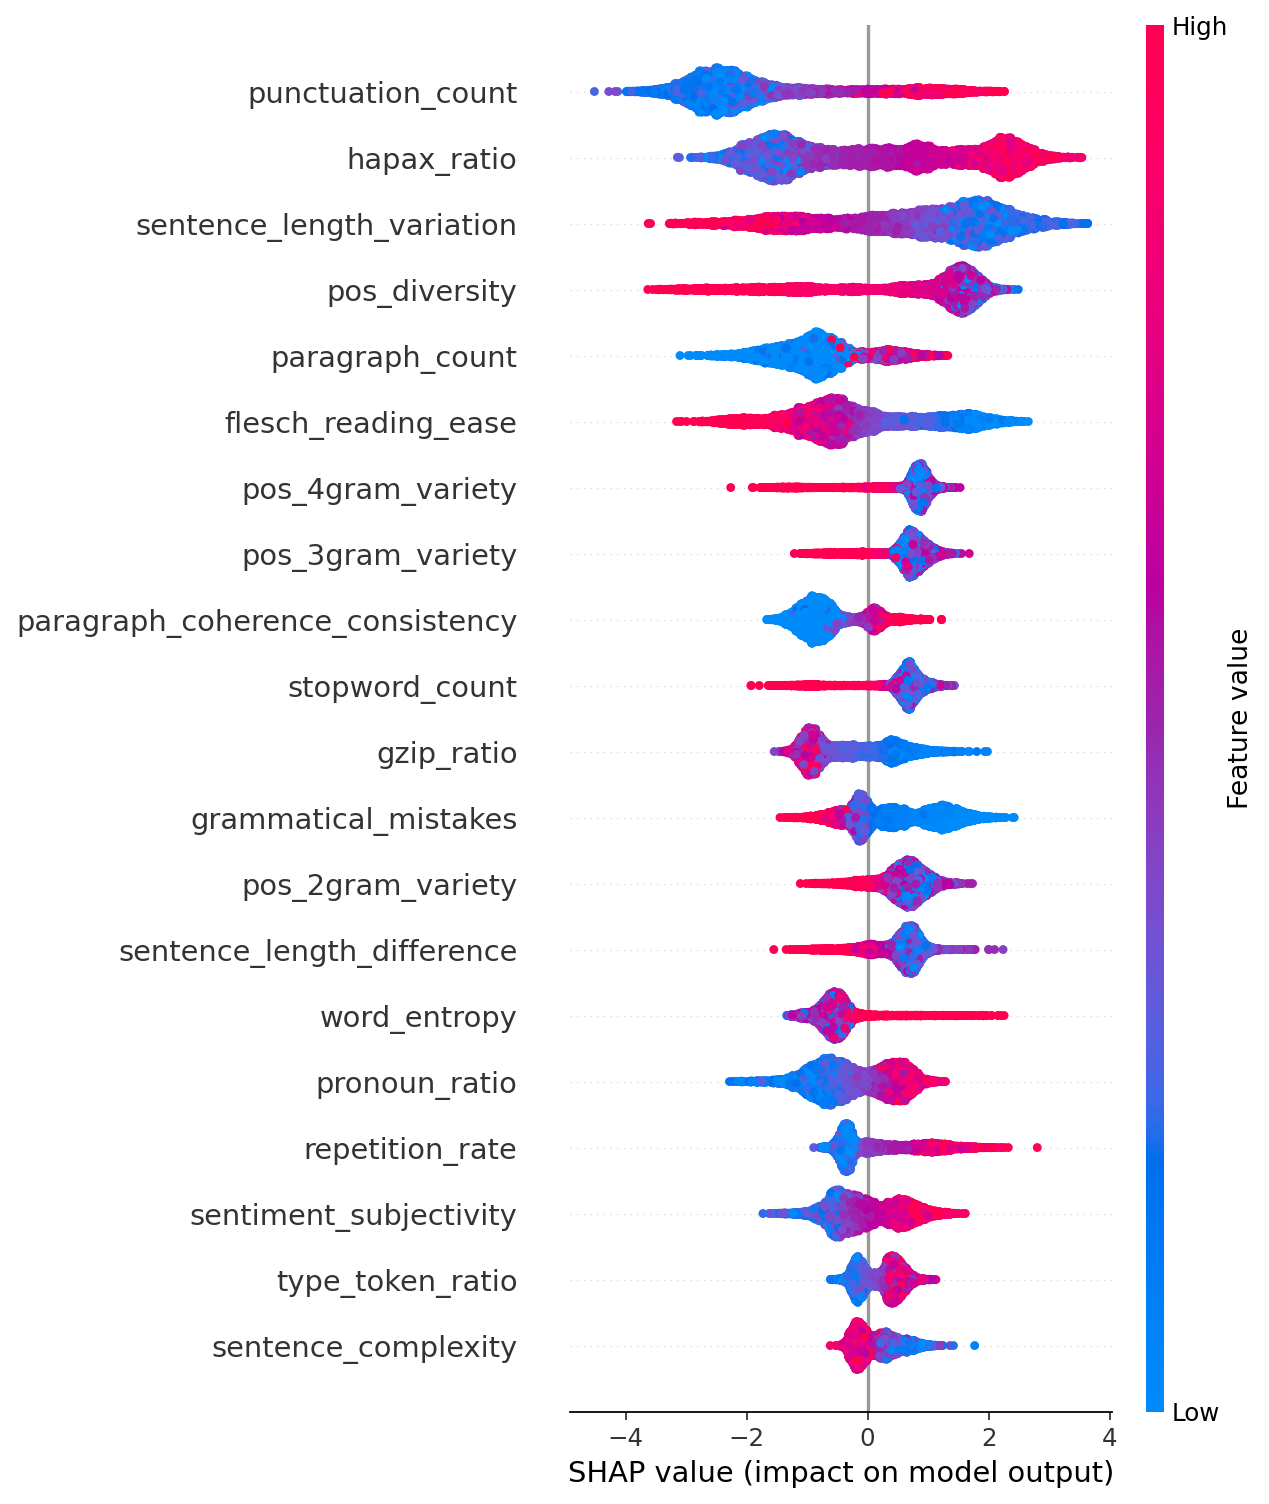

<Figure size 1024x768 with 0 Axes>

In [29]:
shap.summary_plot(coling_shap_values, coling_test_data)
plt.savefig('shap_summary_plot_coling.png', dpi=300, bbox_inches='tight')

In [30]:
## Installing language-tool-python compatible for kaggle
!pip install -q /kaggle/input/language-tool-python-2-7-1/language_tool_python-2.7.1-py3-none-any.whl

In [31]:
# %% Directory settings

# ====================================================
# Directory settings
# ====================================================
from pathlib import Path
import re

INPUT_DIR = Path("../input/")

import os
import zipfile
from zipfile import ZipFile
import shutil

# create download path
def get_language_tool_cache_path():
    # Get download path from environment or use default.
    download_path = os.environ.get(
        'LTP_PATH',
        os.path.join(os.path.expanduser("~"), ".cache", "language_tool_python")
    )
    # Make download path, if it doesn't exist.
    os.makedirs(download_path, exist_ok=True)
    return download_path

lt_path = get_language_tool_cache_path()
# lt_path

def get_all_file_paths(directory):
  
    # initializing empty file paths list
    file_paths = []
  
    # crawling through directory and subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
  
    # returning all file paths
    return file_paths        
  
def main():
    # path to folder which needs to be zipped
    directory = '../input/language-tool-python-2-7-1/LanguageTool-5.7/LanguageTool-5.7'
  
    # calling function to get all file paths in the directory
    file_paths = get_all_file_paths(directory)

    # writing files to a zipfile
    with ZipFile('./lt.zip','w') as zip:
        # writing each file one by one
        for file in file_paths:
            zip.write(file)
  
    print('All files zipped successfully!')        
    
main()


 
zip_file = "./lt.zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")
    
#move to cache
!mv {'./input/language-tool-python-2-7-1/LanguageTool-5.7/LanguageTool-5.7'} {lt_path} 
print(os.listdir('/root/.cache/language_tool_python/'))

#remove files from output

shutil.rmtree('./input')
os.remove("./lt.zip")

All files zipped successfully!
Extracted all
['LanguageTool-5.7']


In [32]:
import language_tool_python

tool = language_tool_python.LanguageTool('en-US')

def grammatical_mistakes(sentence):

  mistakes = len(tool.check(sentence))

  return mistakes

def pos_tag_ngrams(text, n=2):
    doc = nlp(text)
    tags = [token.pos_ for token in doc if token.is_alpha]

    if len(tags) < n:
        return {}

    ngrams = zip(*[tags[i:] for i in range(n)])
    return Counter(ngrams)

def pos_ngram_variety(text, n=2):
    ngrams = pos_tag_ngrams(text, n)
    return len(ngrams)


# ========== Feature Extraction ==========
def get_features_from_text(text: str):
    stop_words = set(stopwords.words('english'))

    data = {
        'character_count': len(text),
        'word_count': len(text.split()),
        'sentence_count': len(sent_tokenize(text)),
        'paragraph_count': len(text.split("\n")),
        'stopword_count': len([w for w in text.split() if w.lower() in stop_words]),
        'unique_word_count': len(set(text.split())),
        'sentiment_polarity': TextBlob(text).sentiment.polarity,
        'sentiment_subjectivity': TextBlob(text).sentiment.subjectivity,
        'discourse_marker_count': count_discourse_markers(text),
        'vocab_size': vocabSize(text),
        'sentence_complexity': sentence_complexity(text),
        'punctuation_count': punctuation_count(text),
        'sentence_length_difference': sentence_length_difference(text),
        'type_token_ratio': type_token_ratio(text),
        'word_entropy': word_entropy(text),
        'flesch_reading_ease': flesch_reading_ease(text),
        'gzip_ratio': gzip_ratio(text),
        'negation_freq': negation_frequency(text),
        'question_stmt_ratio': question_statement_ratio(text),
        'clause_sentence_ratio': clause_to_sentence_ratio(text),
        'modal_freq': modal_verb_frequency(text),
        'pronoun_ratio': pronoun_ratio(text),
        'pos_diversity': pos_diversity(text),
        'hapax_ratio': hapax_legomena_ratio(text),
        'sentence_length_variation' : sentence_length_variation(text),
        'repetition_rate' : repetition_rate(text),
        'personal_voice_score' : personal_voice_score(text),
        'emotion_variation' : emotion_variation(text),
        'specificity_score' : specificity_score(text),
        'figurative_language_score' : figurative_language_score(text),
        'paragraph_coherence_consistency' : paragraph_coherence_consistency(text),
        'predictability_score' : predictability_score(text),
        'hedge_uncertainty_score' : hedge_uncertainty_score(text),
        'transition_variety_score' : transition_variety_score(text),
        'grammatical_mistakes':grammatical_mistakes(text),
        'pos_2gram_variety':pos_ngram_variety(text),
        'pos_3gram_variety':pos_ngram_variety(text,n=3),
        'pos_4gram_variety':pos_ngram_variety(text,n=4)
    }
    
    return pd.DataFrame([data])[FEATURES]

In [33]:
import pandas as pd
import shap
import numpy as np

def shap_top_feature_explanations(model, X, sample_features, top_n=10):
    """
    Explain the model's decision using SHAP values for the top features.
    
    Parameters:
    - model: trained XGBoost model
    - X: full training dataframe (without label)
    - sample_features: dataframe containing 1 row of extracted features for the sample
    - top_n: number of top important features to analyze

    Returns:
    - DataFrame summarizing the feature-level SHAP explanations
    """

    # === SHAP explainer ===
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X)

    # === Identify top N features by importance (model-based) ===
    importance_df = (
        pd.DataFrame({
            "Feature": model.get_booster().feature_names,
            "Importance": model.feature_importances_
        })
        .sort_values("Importance", ascending=False)
        .head(top_n)
    )

    top_features = importance_df["Feature"].tolist()

    # === Compute SHAP values for the sample ===
    sample_shap = explainer(sample_features)

    # === Natural-language explanation report ===
    explanations = []
    print(f"The model predicts the given sample as {model.predict(sample_features)[0]}")

    print("\n=== SHAP-BASED EXPLANATION FOR TOP FEATURES ===\n")

    for feat in top_features:

        shap_val = sample_shap.values[0][list(X.columns).index(feat)]
        direction = "AI" if shap_val > 0 else "Human"
        magnitude = round(abs(shap_val), 4)
        value = round(sample_features[feat].iloc[0], 4)

        print(
            f"- **{feat}** → Value: {value}, SHAP: {shap_val:+.4f} "
            f"→ This feature pushes the prediction toward **{direction}** "
            f"(strength = {magnitude})."
        )

        explanations.append({
            "Feature": feat,
            "Sample_Value": value,
            "SHAP_Value": round(shap_val, 4),
            "Direction": direction,
            "Contribution_Strength": magnitude,
            "Feature_Importance_Rank": top_features.index(feat) + 1,
        })

    print("\n===============================================\n")

    return pd.DataFrame(explanations)

In [34]:
gpt_text = """
Modern classrooms often emphasize technical competence, yet many students still struggle with basic collaboration skills. This challenge becomes visible when group projects break down because individuals feel unheard or undervalued. Teachers often interpret this as a lack of motivation, but the root cause is usually a lack of structured opportunities to practice empathy and communication.

One effective approach is to encourage students to explain their reasoning rather than defend their conclusions. When a student articulates how they reached an answer, peers begin to see the value in process-oriented thinking. This reduces conflict and fosters a healthier intellectual environment.

Another strategy involves rotating group roles. When students regularly switch between tasks—such as researcher, scribe, presenter, and evaluator—they develop a broader understanding of how collaborative work functions. It also prevents one individual from dominating the group dynamic.

Teachers can also model productive disagreement. Instead of correcting a student outright, they can pose counterquestions that highlight gaps in reasoning. This shows students that disagreement can lead to clarity rather than confrontation.

Regular reflection sessions amplify these benefits. After each project, students can write short notes about what went well and what created tension. This metacognitive step helps them recognize patterns in their behavior.

Importantly, collaboration skills do not have to be tied only to academic tasks. Shared non-academic activities—such as maintaining a class garden, organizing a small event, or creating artwork—serve as low-pressure environments where students practice cooperation naturally.

Classroom climate plays a major role as well. Students are more willing to collaborate when they feel psychologically safe and respect one another’s contributions. A simple greeting ritual at the beginning of class can set the tone for the entire day.

Technology can either help or hinder these efforts. Collaborative digital tools make it easier for reserved students to contribute because they have more time to formulate their thoughts. However, overreliance on digital communication reduces face-to-face interaction, which remains essential for building trust.

Teachers should also consider linguistic and cultural diversity within the classroom. A strategy that works well for native speakers may unintentionally exclude multilingual learners. Small adjustments—such as providing sentence starters or allowing more wait time—can make group work significantly more inclusive.

Assessment systems must align with these goals. If grading focuses only on the final product, students will see little value in the collaborative process. Rubrics that reward communication, equitable participation, and constructive feedback create stronger incentives.

Family engagement enhances collaboration skills outside of school hours. When parents understand the purpose of group activities, they can reinforce these skills at home through shared chores or family discussions.

Schools should also provide professional development for teachers. Many educators were never explicitly taught how to facilitate group dynamics, yet they are expected to manage them effectively. Short workshops can introduce practical tools such as conflict-mapping, turn-taking strategies, and equitable questioning.

Finally, patience is crucial. Collaboration skills are not mastered in a few weeks; they evolve gradually through recurring practice and reflection. Schools that remain committed to the process eventually see improvements not only in group work but also in academic performance and overall classroom culture.

In the long run, teaching students how to collaborate is as important as teaching them mathematics or reading. These skills shape their relationships, careers, and ability to contribute meaningfully to society.
"""

In [35]:
results_df = shap_top_feature_explanations(models['XGB'], X_test, get_features_from_text(gpt_text)[FEATURES])
print("\nSummary of Thresholds and SHAP Effects:\n", results_df)

The model predicts the given sample as 1

=== SHAP-BASED EXPLANATION FOR TOP FEATURES ===

- **pos_diversity** → Value: 2.1033, SHAP: +1.8013 → This feature pushes the prediction toward **AI** (strength = 1.801300048828125).
- **sentence_length_variation** → Value: 5.2982, SHAP: +2.0459 → This feature pushes the prediction toward **AI** (strength = 2.0459001064300537).
- **pos_2gram_variety** → Value: 75, SHAP: +0.6456 → This feature pushes the prediction toward **AI** (strength = 0.6456000208854675).
- **sentence_complexity** → Value: 17.162, SHAP: +0.7959 → This feature pushes the prediction toward **AI** (strength = 0.7958999872207642).
- **character_count** → Value: 3934, SHAP: +0.3604 → This feature pushes the prediction toward **AI** (strength = 0.36039999127388).
- **hapax_ratio** → Value: 0.717, SHAP: +0.4577 → This feature pushes the prediction toward **AI** (strength = 0.4577000141143799).
- **pos_3gram_variety** → Value: 227, SHAP: +0.3223 → This feature pushes the predictio

## Interpretation of results in COLING

In [36]:
results_df = shap_top_feature_explanations(models['XGB'], coling_test_data, get_features_from_text(human_text)[FEATURES])
print("\nSummary of Thresholds and SHAP Effects:\n", results_df)

The model predicts the given sample as 0

=== SHAP-BASED EXPLANATION FOR TOP FEATURES ===

- **pos_diversity** → Value: 2.2717, SHAP: -0.3832 → This feature pushes the prediction toward **Human** (strength = 0.3831999897956848).
- **sentence_length_variation** → Value: 15.3753, SHAP: -2.3264 → This feature pushes the prediction toward **Human** (strength = 2.3264000415802).
- **pos_2gram_variety** → Value: 98, SHAP: -0.1891 → This feature pushes the prediction toward **Human** (strength = 0.1890999972820282).
- **sentence_complexity** → Value: 20.6733, SHAP: +0.1107 → This feature pushes the prediction toward **AI** (strength = 0.11069999635219574).
- **character_count** → Value: 3684, SHAP: -0.8376 → This feature pushes the prediction toward **Human** (strength = 0.8375999927520752).
- **hapax_ratio** → Value: 0.7143, SHAP: -0.0014 → This feature pushes the prediction toward **Human** (strength = 0.00139999995008111).
- **pos_3gram_variety** → Value: 272, SHAP: -0.1431 → This feature 